# 여자배구-EDA(각 시즌 별 승률 1등팀 분석)

## 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display, HTML
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

warnings.filterwarnings('ignore') # 경고 무시

## 데이터 불러오기

### 경기_시즌별 데이터 불러오기

In [2]:
경기_시즌별 = pd.read_csv("./경기_시즌별.csv", encoding='utf8')
경기_시즌별

,Unnamed: 0,시즌,팀명,총경기수,이긴경기,승률,공격종합_성공률,오픈_성공률,시간차_성공률,이동_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률,디그_성공,세트_성공,리시브_정확,블로킹_성공
0,0,17-18,IBK기업은행,36,21,58.333333,21.541927,18.708620,12.508099,8.743151,7.450573,7.444193,16.925208,0.124089,7.679688,4.846354,2.841146,0.765625
1,1,17-18,현대건설,33,15,45.454545,25.670598,20.193588,16.616877,2.613522,7.148339,10.821860,15.376312,0.146512,8.518272,5.302326,3.524917,1.189369
2,2,17-18,한국도로공사,33,24,72.727273,22.989708,18.414430,15.168594,8.311963,6.456631,8.244828,15.812387,0.112759,7.291777,4.687003,3.381963,0.779841
3,3,17-18,흥국생명,30,11,36.666667,18.930973,15.827432,9.181135,4.907649,5.510054,5.772135,10.157243,0.098811,6.883784,3.932432,2.872973,0.548649
4,4,17-18,KGC인삼공사,30,12,40.000000,21.380336,19.377951,10.874159,2.854190,4.692232,7.619235,13.352722,0.087554,7.556575,4.204893,2.874618,0.746177
5,5,17-18,GS칼텍스,30,13,43.333333,21.447119,18.392715,8.428726,1.315789,6.101884,6.984294,12.589224,0.118227,6.462604,4.448753,2.855956,0.590028
6,0,18-19,한국도로공사,37,25,67.567568,24.038621,20.228341,13.902944,8.423341,5.769276,8.022360,14.526262,0.077967,7.677570,4.675234,3.605140,0.771028
7,1,18-19,흥국생명,34,22,64.705882,21.794680,19.584910,12.593453,4.473325,6.642916,7.107187,10.681125,0.091355,7.465473,4.480818,2.984655,0.728900
8,2,18-19,GS칼텍스,33,16,48.484848,21.434354,18.312101,7.172987,1.316456,6.297544,6.985367,14.295468,0.098354,6.726582,4.326582,2.716456,0.688608
9,3,18-19,IBK기업은행,30,17,56.666667,22.056716,18.953462,12.347189,5.427604,4.876982,9.011923,14.058876,0.110266,7.494083,4.573964,3.144970,0.792899


### 시즌_선수별 데이터 불러오기

In [3]:
시즌_선수별 = pd.read_csv("./시즌별_선수데이터.csv", encoding='utf8')
시즌_선수별

,Unnamed: 0,시즌,팀명,이름,포지션,결과,득점_득점,공격종합_시도,공격종합_성공,공격종합_공격차단,...,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,디그_성공률,세트_성공률,리시브_정확률,블로킹_성공률
0,0,17-18,GS칼텍스,강소휘 (L),L,0,18.117647,41.882353,15.470588,2.647059,...,0.176471,0.262941,13.216471,0.705882,0.0,5.647059,90.418723,14.705882,41.394651,12.726848
1,1,17-18,GS칼텍스,강소휘 (L),L,1,17.230769,39.000000,15.076923,2.076923,...,0.076923,0.326923,13.044615,1.076923,0.0,4.461538,81.101132,33.730159,40.937985,14.289599
2,2,17-18,GS칼텍스,김유리 (C),C,0,4.312500,8.875000,3.062500,0.500000,...,0.187500,0.328125,23.379375,1.250000,0.0,1.312500,79.333333,27.083333,0.000000,8.101021
3,3,17-18,GS칼텍스,김유리 (C),C,1,6.083333,9.500000,4.083333,0.666667,...,0.166667,0.352500,17.024167,1.333333,0.0,1.750000,87.222222,26.190476,100.000000,10.525050
4,4,17-18,GS칼텍스,김진희 (L),L,0,2.076923,5.230769,1.769231,0.461538,...,0.076923,0.015385,4.340769,0.153846,0.0,1.846154,67.142857,14.375000,34.039274,3.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,244,21-22,흥국생명,최윤이 (L),L,0,2.470588,7.117647,2.294118,0.764706,...,0.058824,0.029412,4.015882,0.235294,0.0,0.941176,81.646270,16.496599,28.204618,1.388889
1073,245,21-22,흥국생명,최윤이 (L),L,1,5.000000,12.428571,4.428571,0.714286,...,0.000000,0.131429,5.997143,0.285714,0.0,0.714286,86.438575,29.880952,26.376023,9.523810
1074,246,21-22,흥국생명,캣벨 (R),R,0,21.000000,58.476190,19.190476,4.428571,...,0.285714,0.381429,13.600476,0.476190,0.0,5.761905,78.321691,6.750000,12.500000,17.933072
1075,247,21-22,흥국생명,캣벨 (R),R,1,33.777778,70.333333,31.000000,3.222222,...,0.111111,0.555556,13.281111,0.777778,0.0,4.888889,83.808140,7.222222,0.000000,26.708723


### 시즌_선수별 각 데이터 불러오기

In [4]:
선수17 = pd.read_csv("./선수17.csv", encoding='utf8')
선수18 = pd.read_csv("./선수18.csv", encoding='utf8')
선수19 = pd.read_csv("./선수19.csv", encoding='utf8')
선수20 = pd.read_csv("./선수20.csv", encoding='utf8')
선수21 = pd.read_csv("./선수21.csv", encoding='utf8')

## 경기_시즌별 팀별 승률 시각화
- IBK는 17~19시즌까지 하향세, 20시즌에 조금 상승, 21시즌에 다시 하락
- 현대는 하락세를 보이다가 19시즌에 상승, 20시즌에 하락, 21시즌에 1등
- 한국은 19시즌까지 쭉 하락세를 보이다가 현재까지 쭉 상승중
- 흥국은 쭉 상승세를 보이다가 20시즌부터 하락세
- KGC는 18시즌까지 하락세, 그 이후로는 조금씩 상승세
- GS는 조금씩 계속 상승세
- 페퍼는 신생팀이라 3경기만 이겨서 그래프상 보이지 않음

**각 팀별로 어떤요소때문인진 모르겠지만 승률이 쭉 상승세도 보이는 팀이 있고**   
**상승했다가 하락했다가 다양하게 나타남**  
**그래서 그 요소가 무엇인지 알아보겠습니다~**

<AxesSubplot:xlabel='시즌', ylabel='승률'>

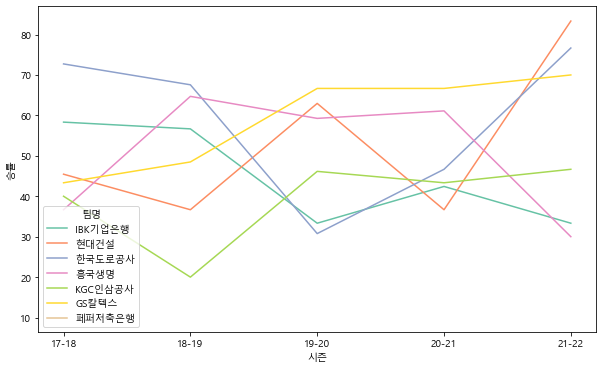

In [5]:
sns.lineplot(data=경기_시즌별, y="승률", x="시즌", hue="팀명", palette='Set2')

<AxesSubplot:xlabel='시즌', ylabel='승률'>

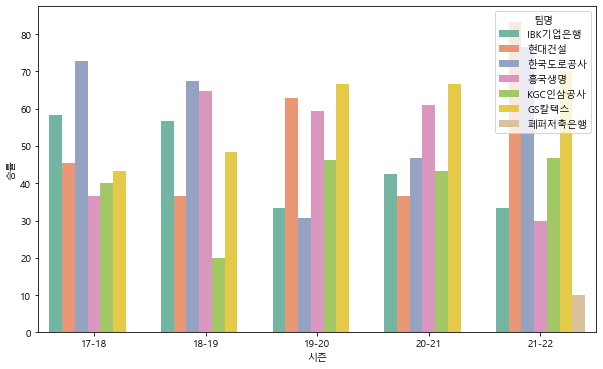

In [6]:
sns.barplot(data=경기_시즌별, y="승률", x="시즌", hue="팀명", palette='Set2')

## 경기_시즌별 팀별 공격 종합 성공률 시각화

<AxesSubplot:xlabel='시즌', ylabel='공격종합_성공률'>

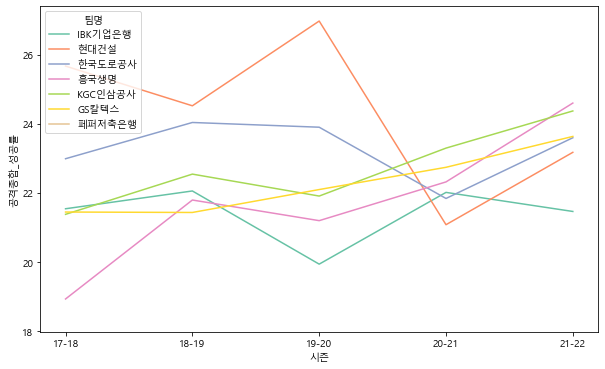

In [7]:
sns.lineplot(data=경기_시즌별, y="공격종합_성공률", x="시즌", hue="팀명", palette='Set2')

<AxesSubplot:xlabel='시즌', ylabel='공격종합_성공률'>

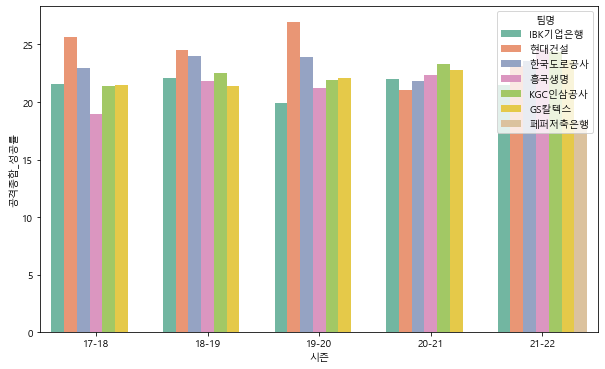

In [8]:
sns.barplot(data=경기_시즌별, y="공격종합_성공률", x="시즌", hue="팀명", palette='Set2')

- 17시즌에 승률이 1등이었던 한국도로공사지만 종합성공률은 현대건설이 제일 높음
- 17시즌 현대 건설의 승률은 3등이었음
- 18, 19시즌 승률 1등은 현대건설, 종합성공률 1등 또한 현대건설
- 승률이 각 팀마다 다 비슷했던 20시즌은 종합성공률도 비슷비슷
- 21시즌 승률 1등은 흥국생명, 종합성공률 1등 또한 흥국생명

>**17시즌을 제외하면 종합성공률이 제일 높은 팀이 승률 또한 제일 높다 라고 분석 가능**

## 각 시즌 1등 팀의 각 선수들 시각화

### 17시즌 승률 1등 한국 도로공사의 5시즌 승률 & 공격, 수비 성공률 상관관계

Text(0, 0.5, '승률 및 성공률')

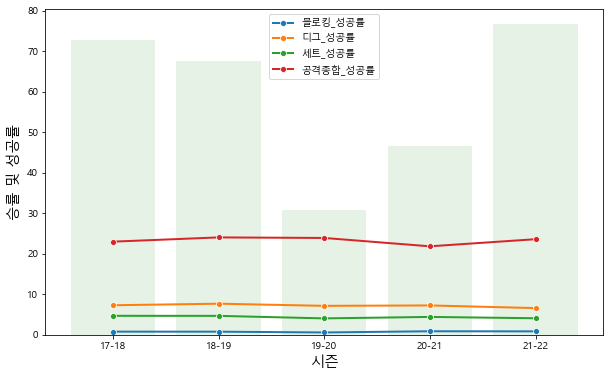

In [9]:
dg = 경기_시즌별[경기_시즌별["팀명"] == '한국도로공사']

plt.bar(dg["시즌"], dg["승률"],color='green',alpha=0.10)
sns.lineplot(data=dg, x="시즌" ,y="블로킹_성공",label="블로킹_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dg, x="시즌" ,y="디그_성공",label="디그_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dg, x="시즌" ,y="세트_성공",label="세트_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=dg, x="시즌" ,y="공격종합_성공률",label="공격종합_성공률",marker='o',linewidth=2.0)


plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

### 17시즌 승률 1등 한국도로공사 각 선수들 시각화

#### 17시즌 승률 1등 한국도로공사 각 선수들의 득점 수
- 이바나 선수가 득점수가 제일 높음.
- 이바나 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

<Figure size 1440x720 with 0 Axes>

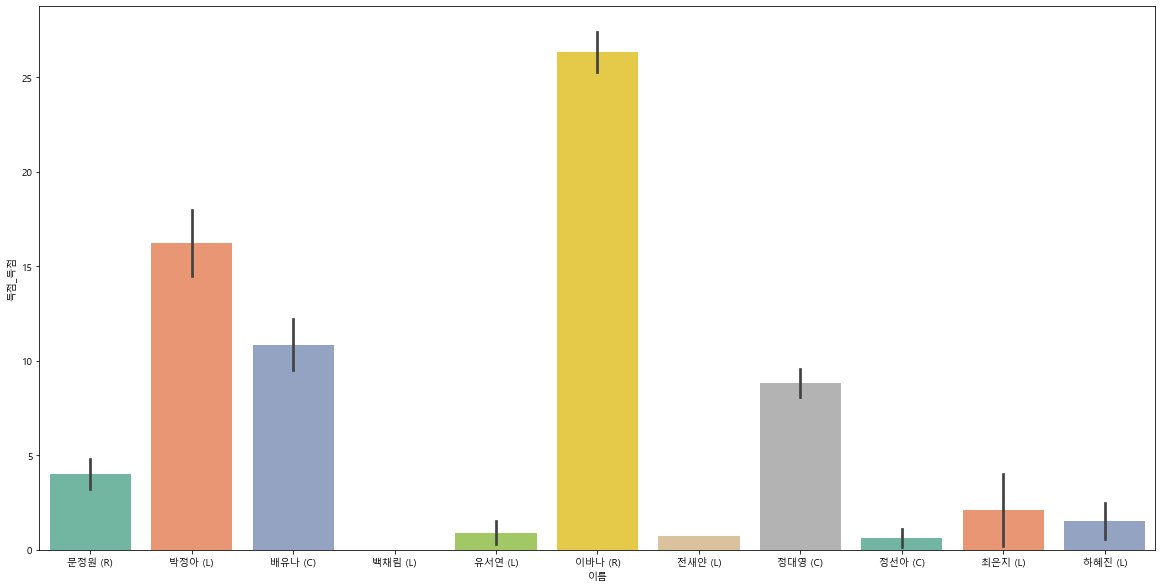

In [10]:
plt.figure(figsize=(20,10))

plt.figure(figsize=(20,10))
data = 선수17[선수17["팀명"] == '한국도로공사']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data = data,
             y="득점_득점", 
             x="이름",
            palette='Set2'
            )

### 18시즌 승률 1등 한국도로공사 각 선수들 시각화

#### 18시즌 승률 1등 한국도로공사 각 선수들의 득점 수
- 파튜 선수가 득점수가 제일 높음.
- 파튜 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당
- 박정아(L) 선수도 득점수가 비등하게 높은 편

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

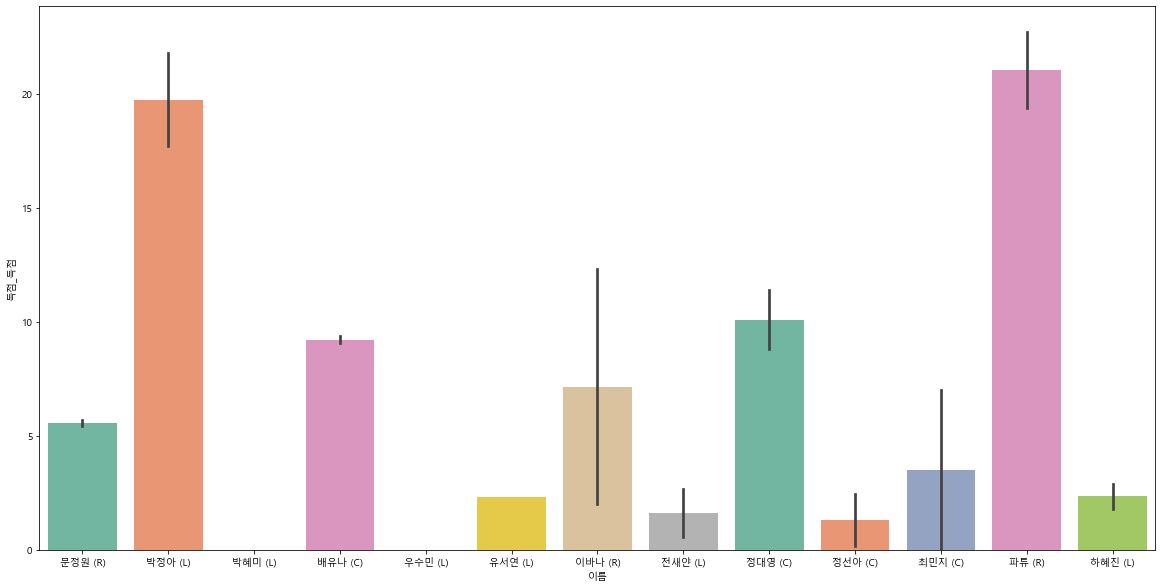

In [11]:
plt.figure(figsize=(20,10))
data=선수18[선수18["팀명"] == '한국도로공사']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름",
             palette='Set2'
            )

### 19시즌 승률 1등 GS칼텍스의 5시즌 승률 & 성공률 상관관계

Text(0, 0.5, '승률 및 성공률')

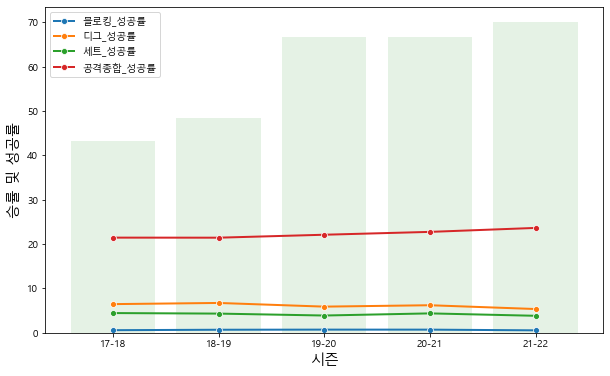

In [12]:
gs = 경기_시즌별[경기_시즌별["팀명"] == 'GS칼텍스']

plt.bar(gs["시즌"], gs["승률"],color='green',alpha=0.10)
sns.lineplot(data=gs, x="시즌" ,y="블로킹_성공",label="블로킹_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=gs, x="시즌" ,y="디그_성공",label="디그_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=gs, x="시즌" ,y="세트_성공",label="세트_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=gs, x="시즌" ,y="공격종합_성공률",label="공격종합_성공률",marker='o',linewidth=2.0)


plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

### 19시즌 승률 1등 GS칼텍스 각 선수들 시각화

#### 19시즌 승률 1등 GS칼텍스 각 선수들의 득점 수
- 러츠 선수가 득점수가 제일 높음.
- 러츠 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

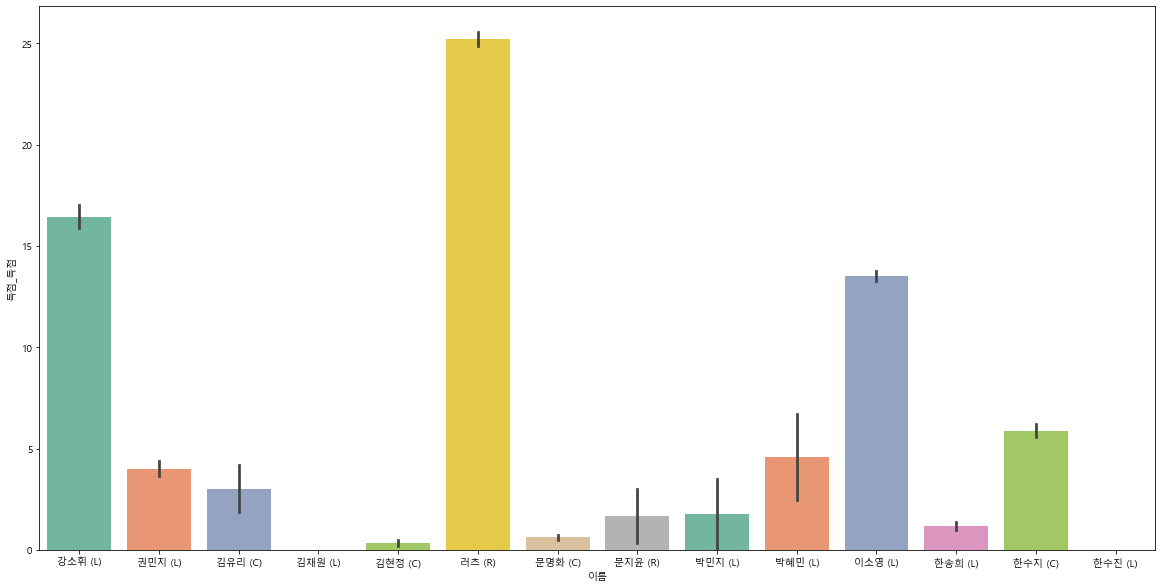

In [13]:
plt.figure(figsize=(20,10))
data=선수19[선수19["팀명"] == 'GS칼텍스']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름", 
             palette='Set2'
            )

### 20시즌 승률 1등 GS칼텍스 각 선수들 시각화

#### 20시즌 승률 1등 GS칼텍스 각 선수들의 득점 수
- 러츠 선수가 득점수가 제일 높음.
- 러츠 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

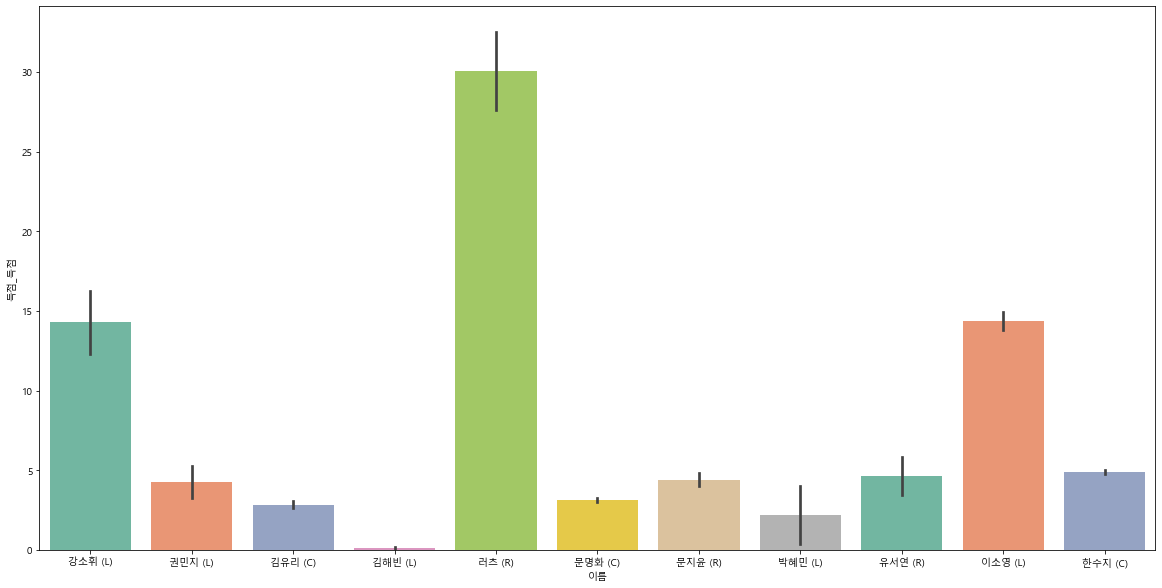

In [14]:
plt.figure(figsize=(20,10))
data=선수20[선수20["팀명"] == 'GS칼텍스']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름", 
             palette='Set2'
            )

### 21시즌 승률 1등 현대건설 각 선수들 시각화

Text(0, 0.5, '승률 및 성공률')

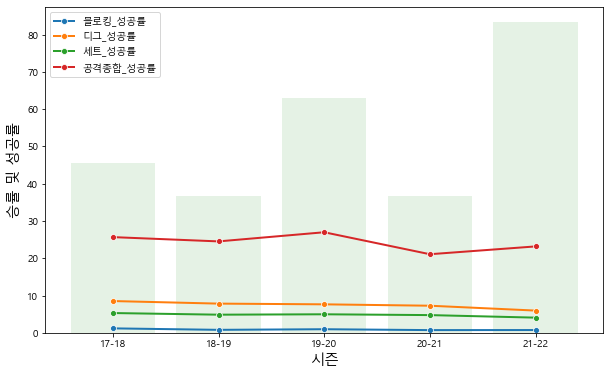

In [15]:
hd = 경기_시즌별[경기_시즌별["팀명"] == '현대건설']

plt.bar(hd["시즌"], hd["승률"],color='green',alpha=0.10)
sns.lineplot(data=hd, x="시즌" ,y="블로킹_성공",label="블로킹_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hd, x="시즌" ,y="디그_성공",label="디그_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hd, x="시즌" ,y="세트_성공",label="세트_성공률",marker='o',linewidth=2.0)
sns.lineplot(data=hd, x="시즌" ,y="공격종합_성공률",label="공격종합_성공률",marker='o',linewidth=2.0)


plt.xlabel('시즌',size="x-large")
plt.ylabel('승률 및 성공률',size="x-large")

### 21시즌 승률 1등 현대건설 각 선수들 시각화

#### 21시즌 승률 1등 현대건설 각 선수들의 득점 수
- 야스민 선수가 득점수가 제일 높음.
- 야스민 선수는 용병임(외국인 선수) - Right 포지션을 맡았으며 주 공격 담당

<AxesSubplot:xlabel='이름', ylabel='득점_득점'>

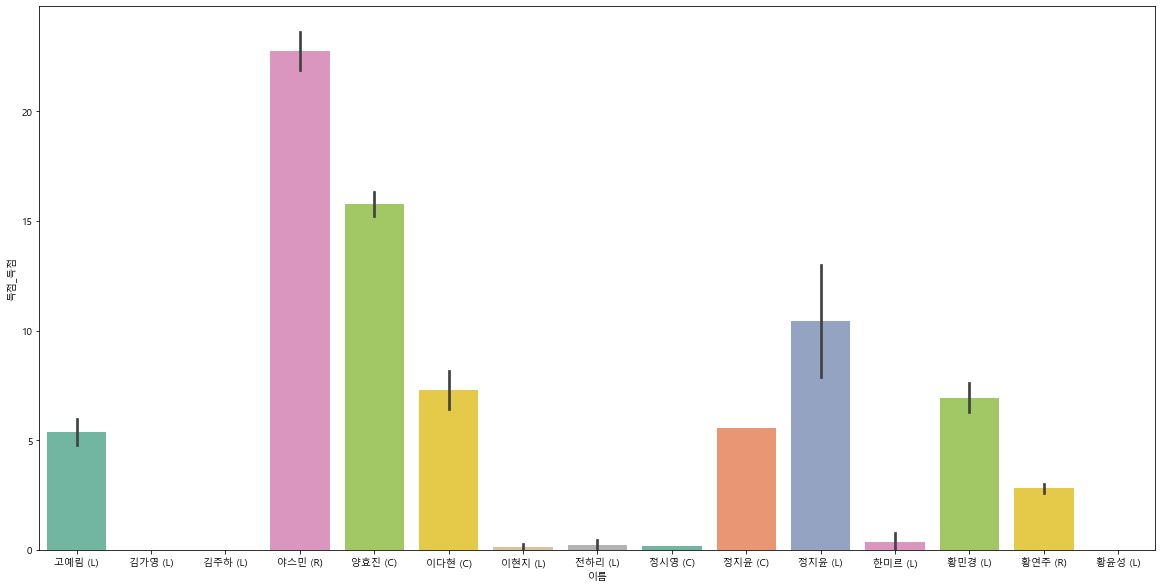

In [16]:
plt.figure(figsize=(20,10))
data=선수21[선수21["팀명"] == '현대건설']
data = data[ (data["포지션"]== 'L')  | (data["포지션"] == 'R') | (data["포지션"] == 'C')]
sns.barplot(data=data, 
             y="득점_득점", 
             x="이름", 
             palette='Set2'
            )

# 우리가 확인한 EDA 결과

## 각 시즌 승률 1등 팀의 승률에 가장 큰 영향을 미치는 것은 공격종합_성공률이다

## 각 승률 1등팀의 득점수와 공격성공률은 R포지션을 담당하는 용병(외국인선수)한테 많은 영향을 받음
### 한국도로공사의 경우에는 R포지션의 용병선수와 L포지션의 한국선수의 득점수와 공격성공률이 높은것이 조금 예외였음. R에만 공격을 몰아주는게 아닌 전략적으로 R,L 포지션 공격수를 나누어서 득점한것으로 보임

## Center선수가 공격성공률이 높은 경우가 꽤 나오는데 그런 경우 모두 공격시도 자체가 별로 없어서 성공률이 높게 나오는것이었음
### 현대건설의 경우에는 C포지션의 양효진 선수가 공격시도도 높고, 성공률도 높았는데 이 선수가 속공공격을 잘하는 선수여서 공격이 거의 득점으로 이어지는 좋은 선수였음